# Project description

## Context

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

In this project, we will:

Learn to predict the probability of churn (for the upcoming month) for each customer

Draw up typical user portraits: select the most outstanding groups and describe their main features

Analyze the factors that impact churn most

Draw basic conclusions and develop recommendations on how to improve customer service:-
Identify target groups

Suggest measures to cut churn

In this project we will:

Review the dataset to check if there are any missing values that should be addressed before the analysis

Exploring the data distribution by churn/stay groups

Analyze correlations between the features with the target feature- churn

Build a model to predict customer churn.

Train the clustering model with the K-means algorithm and do the predictions and examine the distributions of features for the cluster

Calculate churn rates

Table of Contents


## Description of the data

Model Fitness provided with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:

Churn — the fact of churn for the month in question

Current dataset fields:

User data for the preceding month

gender

Near_Location — whether the user lives or works in the neighborhood where the gym is located

Partner — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

Phone — whether the user provided their phone number

Age

Lifetime — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status

Contract_period — 1 month, 3 months, 6 months, or 1 year

Month_to_end_contract — the months remaining until the contract expires

Group_visits — whether the user takes part in group sessions

Avg_class_frequency_total — average frequency of visits per week over the customer's lifetime

Avg_class_frequency_current_month — average frequency of visits per week over the preceding month

Avg_additional_charges_total — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Downloading the data

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from scipy import stats
import math
from scipy import stats
import pandas as pd
import datetime
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


In [2]:
try:
    data=pd.read_csv('/datasets/gym_churn_us.csv')
except:
     data=pd.read_csv('C:/Projects/datasets/gym_churn_us.csv')

## 2. Carry out exploratory data analysis (EDA)

Let's have a look to our data. We have 4000 cases and 14 features.

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
data.duplicated().sum()

0

We do not see any missing values and there's no need to change any datatypes. We also have no duplicates. Our data is ready for analysis.

The first step will be to find who mostly leaves our gym and who stays.

In [7]:
churn=data.groupby(by=["Churn"]).mean().T
churn.columns=['stay','left']

churn

,stay,left
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


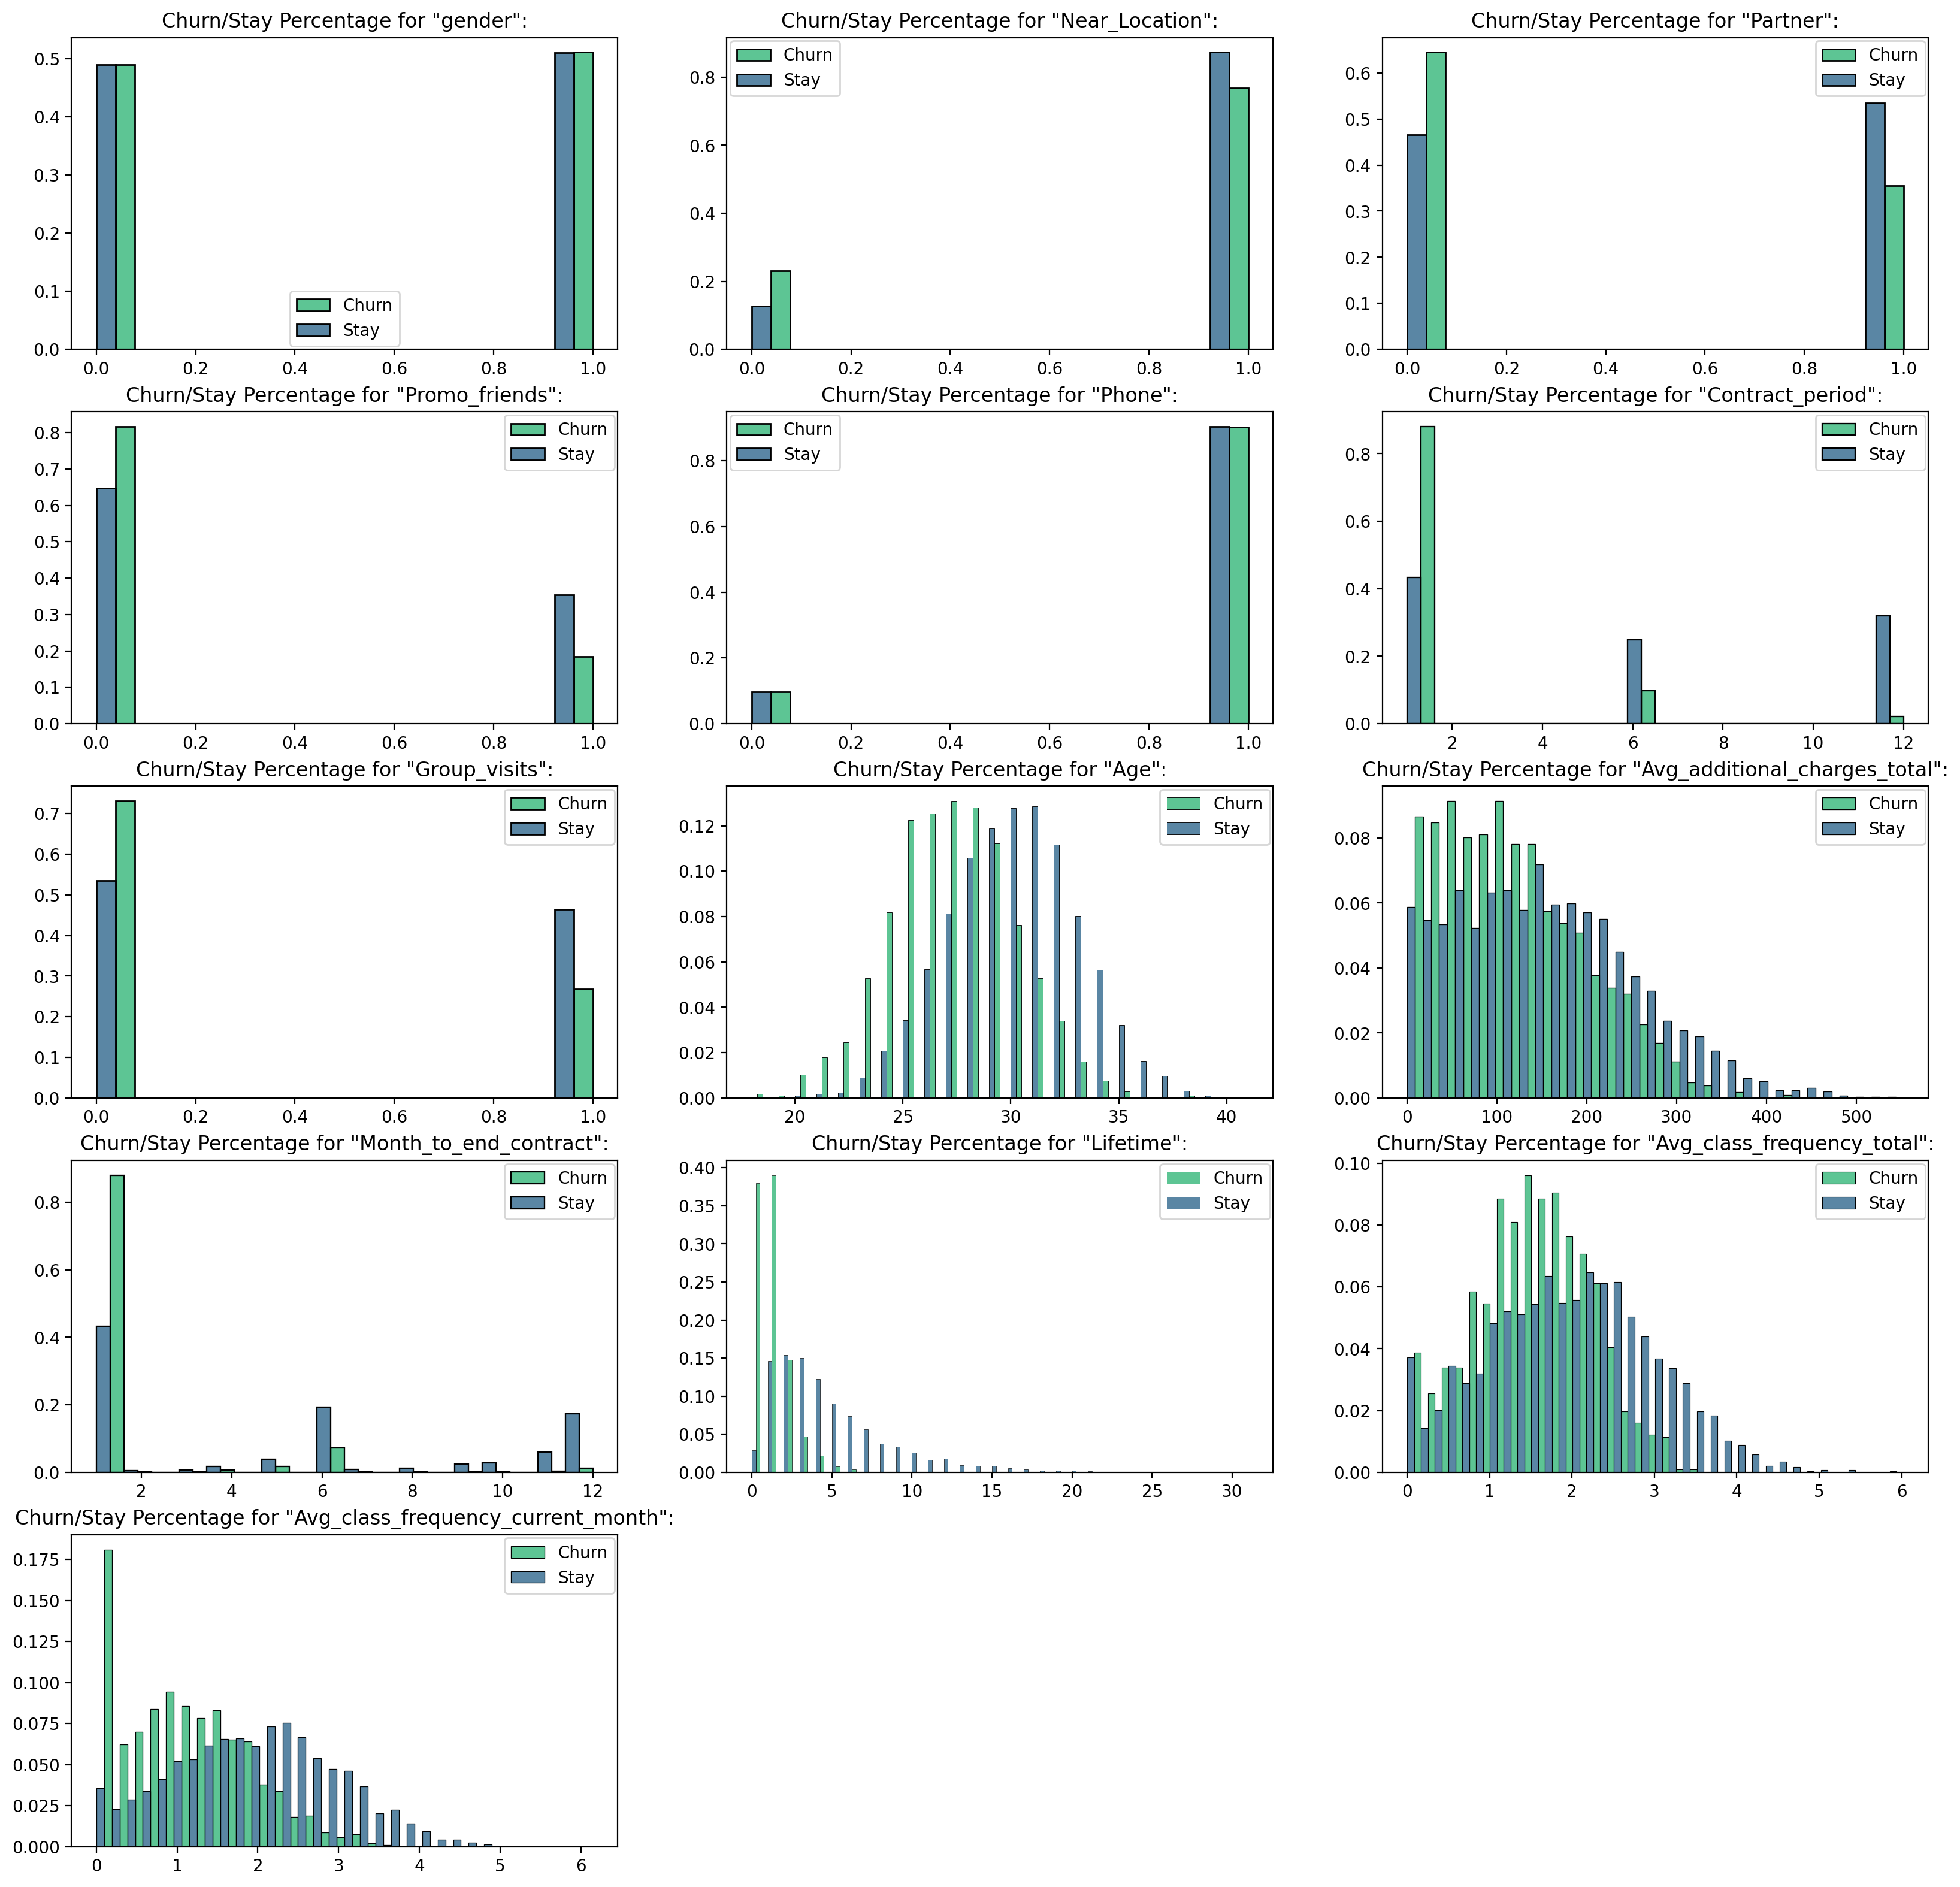

In [9]:
row, column = 5,3
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(20, 20), dpi=200)
columns = ["gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", 
           "Group_visits", "Age", "Avg_additional_charges_total", "Month_to_end_contract", "Lifetime", 
           "Avg_class_frequency_total", "Avg_class_frequency_current_month"]
for col in columns:
    ax = plt.subplot2grid((row, column), (x_i, y_i))
    sns.set_palette('viridis', 2)
    ax = sns.histplot(data=data, x=col, hue='Churn', stat="probability", common_norm=False, multiple="dodge", alpha=0.8)
    plt.legend(loc='best', borderaxespad=0.2, labels=["Churn","Stay"])
    ax.set(xlabel=None, ylabel=None, title='Churn/Stay Percentage for "{}":'.format(col))
    y_i += 1
    if y_i == column: 
        x_i += 1
        y_i = 0

According to our data:
- gender isn't affect to the decision to leave or stay
- the closer the gym is to the place where clients live or work the more likely they stay
- the longer and more often clients attend the gym the smaller churn rate is (Almost no one with a one-year contract leaves the club, and most clients with a one-month contract leave)
- if the client is an employee of a partner company or originally signed up through a "bring a friend" offer the more likely he will stay
- the higher the amount of money spent on other gym services, the lower is the churn rate
- time that remaining until the contract expires make clients decide to stay

In [10]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


   Our previous insights based on mean differences can't be taken into account without calculating statistical coefficients of correlation. According the table above there are weak statistical significant differences between churn rate and:
   
   - the time (in months) since the customer first came to the gym  
    
   - average frequency of visits per week over the customer's lifetime 
    
   - contract_period
    
   - the months remaining until the contract expires
  
   There are no statistical significant differences between other features.

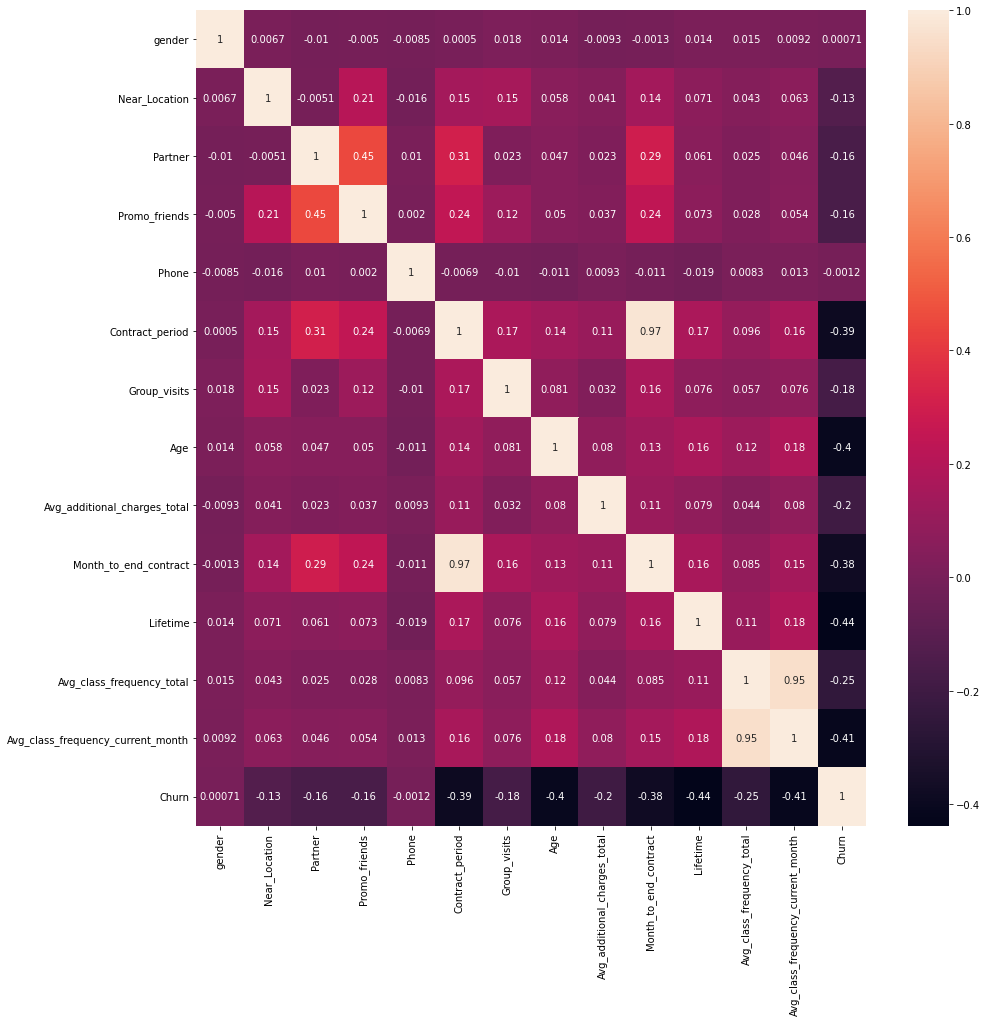

In [11]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
ax.set_ylim(14, 0)
plt.show()

#### Conclusion:

There are statistically proven reverse correlation between churn rate and:

- duration of attendance at the gym, 

- average frequency of visits per week

- contract_period and the months remaining until the contract expires.

    Customers who longer, more often attend classes, bought the longer contract and haven't spent it, are more loyal which is obvious.
 

# Build a model to predict user churn

Let's build a binary classification model for customers where the target feature is the user's leaving next month.

We will divide the data into train and validation sets.

In [12]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

Let's traine the model on the train set with logistic regression and random forest.

In [14]:
model=LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.87
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model=RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


#### Conclusion:

In our analysis we built and trained 2 models: logistic regression and random forest. 

All metrics are above 80% so we can conclude that models made the right predictions.

Accuracy for both models =92%

Logistic regression wins slightly in terms of - Precision and Random forest - in terms of recall

# Create user clusters

Let's standardize the data:

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Let's build a matrix of distances based on the standardized feature matrix and plot a dendrogram. The dendrogram shows that we have 4 main clusters.

In [17]:
linked = linkage(X_sc, method = 'ward') 

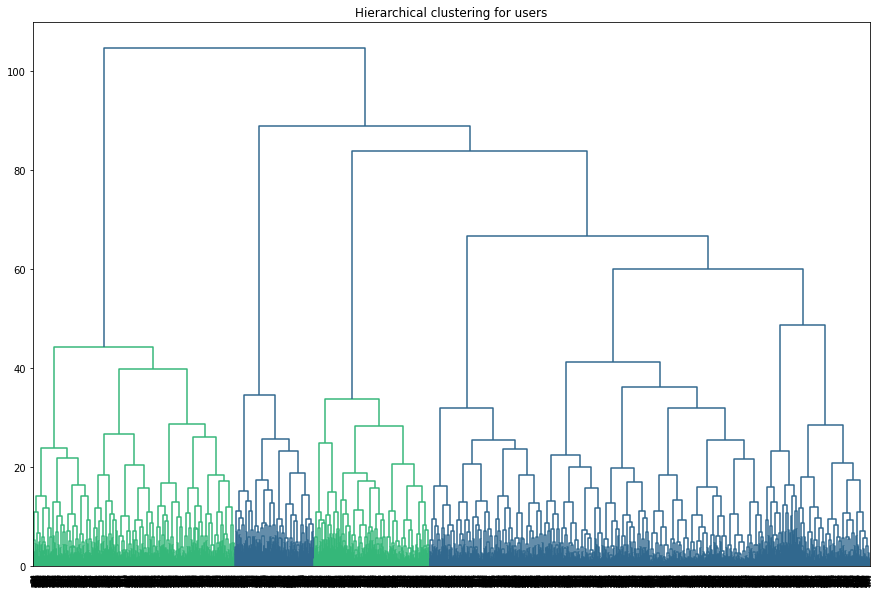

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for users')
plt.show() 

In [19]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [20]:
data['cluster'] = labels

Let's look at the mean feature values for clusters

In [21]:
data.groupby(['cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Studying the clusters we can say:
 
#### Cluster 0:
- Clients of cluster 0 are mostly employees of a partner company, originally signed up through a "bring a friend" offer. Users of this cluster have contracts for more than 10 months, which expire after more than 9 months. They stay with the gym for a long time and prefer to attend group classes, spend on other gym services than client's from other clusters and have a churn rate of only around 3%. We can say that they are the most loyal client's.


#### Cluster 1:
- No one from cluster 1 left their phone number. Clients from this cluster are less loyal than clients from cluster 0 according to all parameters. Churn rate is 27%


#### Cluster 2:
- All clients from cluster 2 do not work and do not live near the fitness center, they mostly do not sign up through a "bring a friend" offer and are less loyal than clients from cluster 1 according to all parameters.  Churn rate is 44%.


#### Cluster 3:
- Here located the most amount of fresh clients with contracts that are about to end. They have the lowest average frequency of visits per week. They have highest churn rate is 51%


#### Cluster 4:
- Clients from this cluster have the highest average frequency of visits per week over the customer's lifetime and  over the preceding month. Stay for a long time with a gym, prefer to attend group classes and spend money on other gym services. They rather buy short term contracts unlike client's from cluster 1 but also have quite a low churn rate 7%.


### Plot distributions of features for the clusters. Do you notice anything?

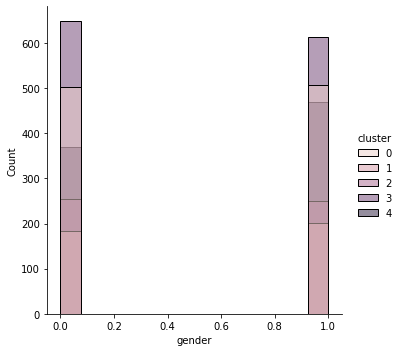

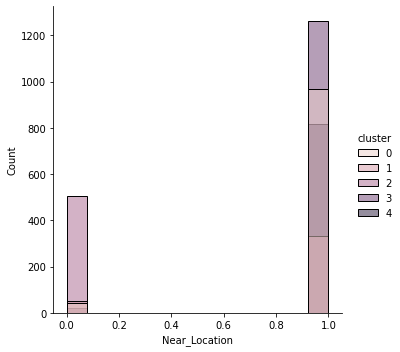

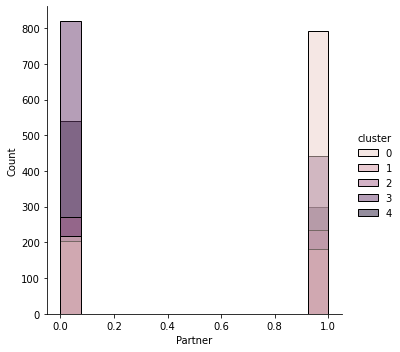

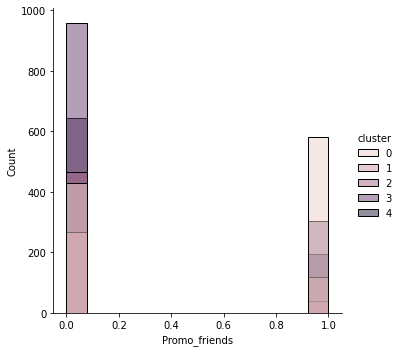

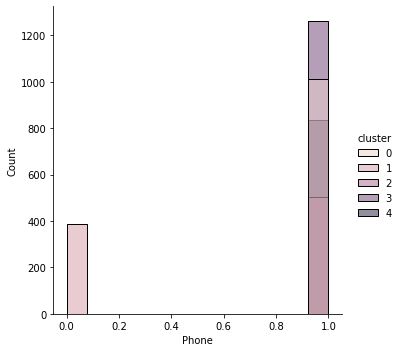

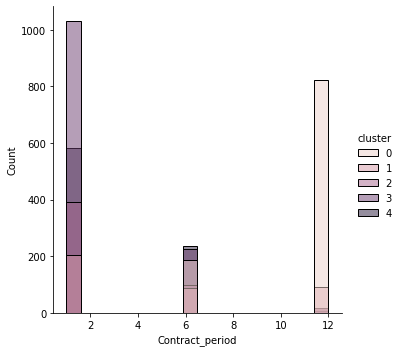

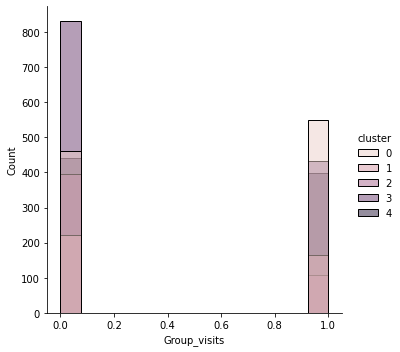

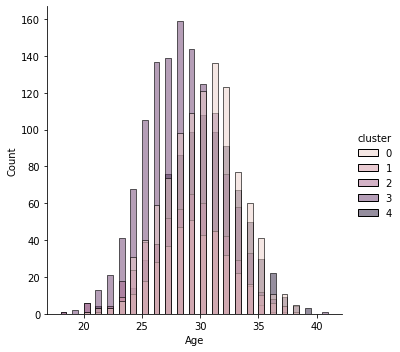

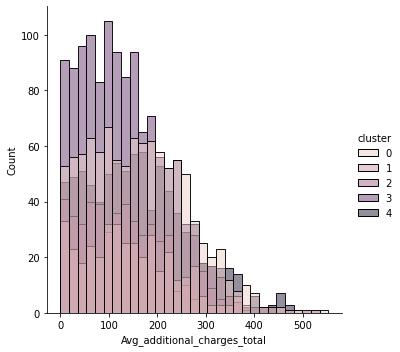

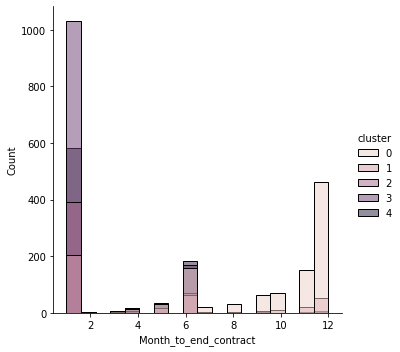

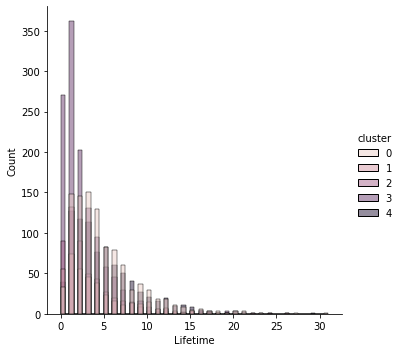

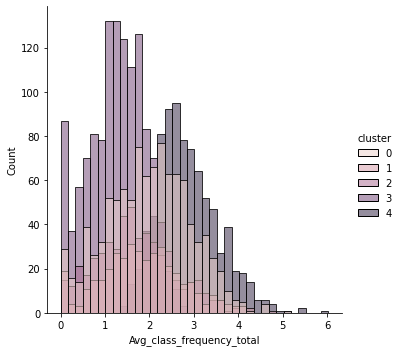

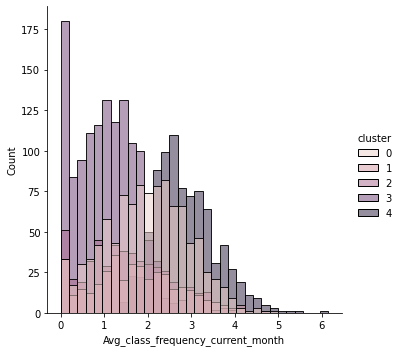

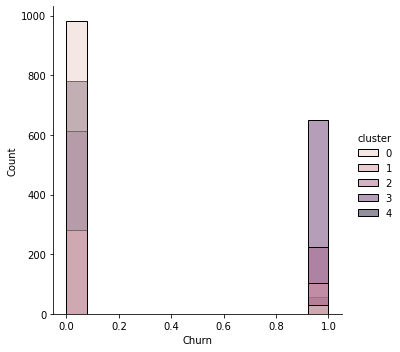

In [22]:
sns.set_palette('colorblind') 
for col in data.drop('cluster', axis=1).columns:
    sns.displot(data, x=col, hue="cluster")

<AxesSubplot:>

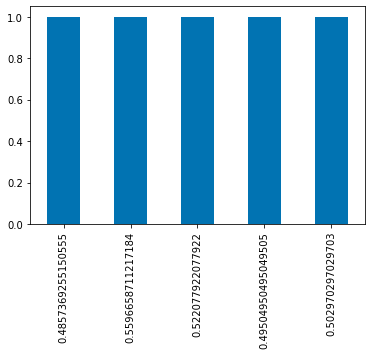

In [23]:
gender=data.groupby(['cluster']).mean()['gender']
gender.value_counts(ascending=False).plot(kind='bar')

### Calculating the churn rate for each cluster

In [24]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [25]:
data.groupby(['cluster']).mean()['Churn']

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

As we have already said, the most loyal clients are located in clusters 0 and 4. Clusters 2 and 3 include clients with the highest churn rate.

## Final conclusion and recommendations:

   Since clients who have the lowest churn rate, the longest contracts and spend the most on services are employees of a partner company,it is necessary to attract new companies to the partnership.
    
   The most loyal clients originally signed up through a "bring a friend" offer, we advise to continue this offer and can think how to develop it. For example, give some gifts to clients who bring a friend. It could be some bonuses at other gym services: cafe, athletic goods, cosmetics, massages, etc. This way we can introduce the services.
   
   The clients who use other gym services are more loyal, we should expand services.
   
   Clients from cluster 3 need the more detailed analysis. They live or work near the gym but half of them are about to leave. Probably we need to make focus-groups to investigate their needs. 
